In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# **Analisis de Precios y Ventas**

In [15]:
df_ventas = pd.read_csv('data/processed_ventas.csv')


In [16]:
df_ventas

,Dia,Producto,Latitud,Longitud,PVP,VentasN,Nombre
0,2016-01-01,95,43.317490,-8.479238,1.169,0.050747,ES4
1,2016-01-01,GOA,43.317490,-8.479238,1.009,0.186170,ES4
2,2016-01-02,95,43.317490,-8.479238,1.169,0.173696,ES4
3,2016-01-02,GOA,43.317490,-8.479238,1.009,0.459796,ES4
4,2016-01-03,95,43.317490,-8.479238,1.169,0.132367,ES4
...,...,...,...,...,...,...,...
27024,2019-01-29,GOA,43.338868,-8.393727,1.219,0.457499,ES7
27025,2019-01-30,95,43.338868,-8.393727,1.259,0.233730,ES7
27026,2019-01-30,GOA,43.338868,-8.393727,1.219,0.624451,ES7
27027,2019-01-31,95,43.338868,-8.393727,1.259,0.246620,ES7


In [17]:
df_ventas.nunique()

Dia          1127
Producto        2
Latitud        12
Longitud       12
PVP           168
VentasN     26926
Nombre         12
dtype: int64

In [18]:
#missing data
total = df_ventas.isnull().sum().sort_values(ascending=False)
percent = (df_ventas.isnull().sum()/df_ventas.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PVP,1224,0.045285
Dia,0,0.000000
Producto,0,0.000000
Latitud,0,0.000000
Longitud,0,0.000000
VentasN,0,0.000000
Nombre,0,0.000000


In [19]:
# Convertinos la columna Dia y Weekday a formato de fecha
df_ventas['Dia'] = pd.to_datetime(df_ventas['Dia'])

df_ventas['Weekday'] = df_ventas['Dia'].dt.day_name()

# Diccionario para traducir los nombres de los días al español
dias_semana_traduccion = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df_ventas['Weekday'] = df_ventas['Weekday'].map(dias_semana_traduccion)

In [20]:
# Calculamos el promedio semanal de ventas por estación
promedio_semanal = df_ventas.groupby(['Nombre', 'Weekday'])['VentasN'].mean().reset_index()

# Total promedio por estación para normalizar
total_promedio_por_estacion = promedio_semanal.groupby('Nombre')['VentasN'].transform('sum')
promedio_semanal['Porcentaje'] = (promedio_semanal['VentasN'] / total_promedio_por_estacion) * 100

# Ordenamos los días de la semana
ordered_days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
promedio_semanal['Weekday'] = pd.Categorical(promedio_semanal['Weekday'], categories=ordered_days, ordered=True)
promedio_semanal = promedio_semanal.sort_values('Weekday')


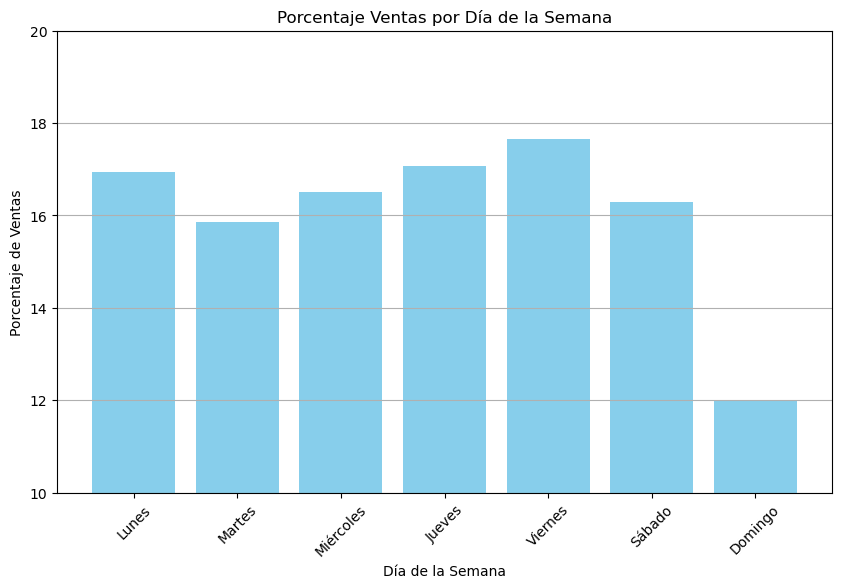

In [11]:

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(promedio_semanal['Weekday'], promedio_semanal['Porcentaje'], color='skyblue')
plt.xlabel('Día de la Semana')
plt.ylabel('Porcentaje de Ventas')
plt.title('Porcentaje Ventas por Día de la Semana')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ylim(10, 20)

plt.show()


In [21]:
df_ventas[['PVP','VentasN']].describe()

,PVP,VentasN
count,25805.000000,27029.000000
mean,1.222579,0.364235
std,0.777890,0.232858
min,0.929000,0.000000
25%,1.159000,0.160586
50%,1.229000,0.319809
75%,1.279000,0.569170
max,124.900000,1.000000


In [22]:
#missing data
total = df_ventas.isnull().sum().sort_values(ascending=False)
percent = (df_ventas.isnull().sum()/df_ventas.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PVP,1224,0.045285
Dia,0,0.000000
Producto,0,0.000000
Latitud,0,0.000000
Longitud,0,0.000000
VentasN,0,0.000000
Nombre,0,0.000000
Weekday,0,0.000000


In [23]:
# Aplicamos forward fill en los nulls
df_ventas.fillna(method='ffill', inplace=True)

In [24]:
#missing data
total = df_ventas.isnull().sum().sort_values(ascending=False)
percent = (df_ventas.isnull().sum()/df_ventas.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Dia,0,0.0
Producto,0,0.0
Latitud,0,0.0
Longitud,0,0.0
PVP,0,0.0
VentasN,0,0.0
Nombre,0,0.0
Weekday,0,0.0


En el siguiente gráfico se presenta el porcentaje de ventas de gasolina y diesel distribuidas a lo largo de los días de la semana en doce estaciones de servicio ubicadas en A Coruña.


In [25]:
# Columna 'Dia' a formato de fecha
df_ventas['Dia'] = pd.to_datetime(df_ventas['Dia'])

# Crear columnas de 'Año' y 'Mes'
df_ventas['Año'] = df_ventas['Dia'].dt.year
df_ventas['Mes'] = df_ventas['Dia'].dt.month

In [26]:
# Se agrupa por estación, año y mes, luego calcular las ventas promedio
df_grouped = df_ventas.groupby(['Nombre', 'Mes'])['VentasN'].mean().reset_index()

# Se obtiene la lista de estaciones únicas
estaciones = df_grouped['Nombre'].unique()

In [27]:
# Ventas mensuales promedio por estación
promedio_mensual = df_ventas.groupby(['Nombre', 'Mes'])['VentasN'].mean().reset_index()

#  Promedios mensuales los escalamos, diviendo entre el promedio total por estación
total_promedio_por_estacion = promedio_mensual.groupby('Nombre')['VentasN'].transform('sum')
promedio_mensual['Porcentaje'] = (promedio_mensual['VentasN'] / total_promedio_por_estacion) * 100

# Crear un DataFrame que asegure que todos los meses están presentes
meses = pd.DataFrame({'Mes': range(1, 13)})
estaciones = promedio_mensual['Nombre'].unique()

Se observa que las ventas no están distribuidas uniformemente a lo largo de la semana, lo cual es un comportamiento esperado en muchos negocios debido a variaciones en el tráfico de clientes y patrones de consumo. Los viernes destacan como el día con el mayor porcentaje de ventas, alcanzando casi el 19%. Esto sugiere que los clientes tienden a repostar combustible al final de la semana laboral, probablemente en preparación para el fin de semana. Los lunes y jueves también muestran un alto porcentaje de ventas, alrededor del 17%.


El siguiente gráfico  muestra el porcentaje de ventas mensuales promedio para doce estaciones de servicio (ES1 a ES12) en A Coruña. Cada línea representa una estación de servicio, y el eje Y muestra el porcentaje de ventas, mientras que el eje X muestra los meses del año.


C:\Users\azize\AppData\Local\Temp\ipykernel_33820\2561220230.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(porcentaje_mensual_pivot.columns))


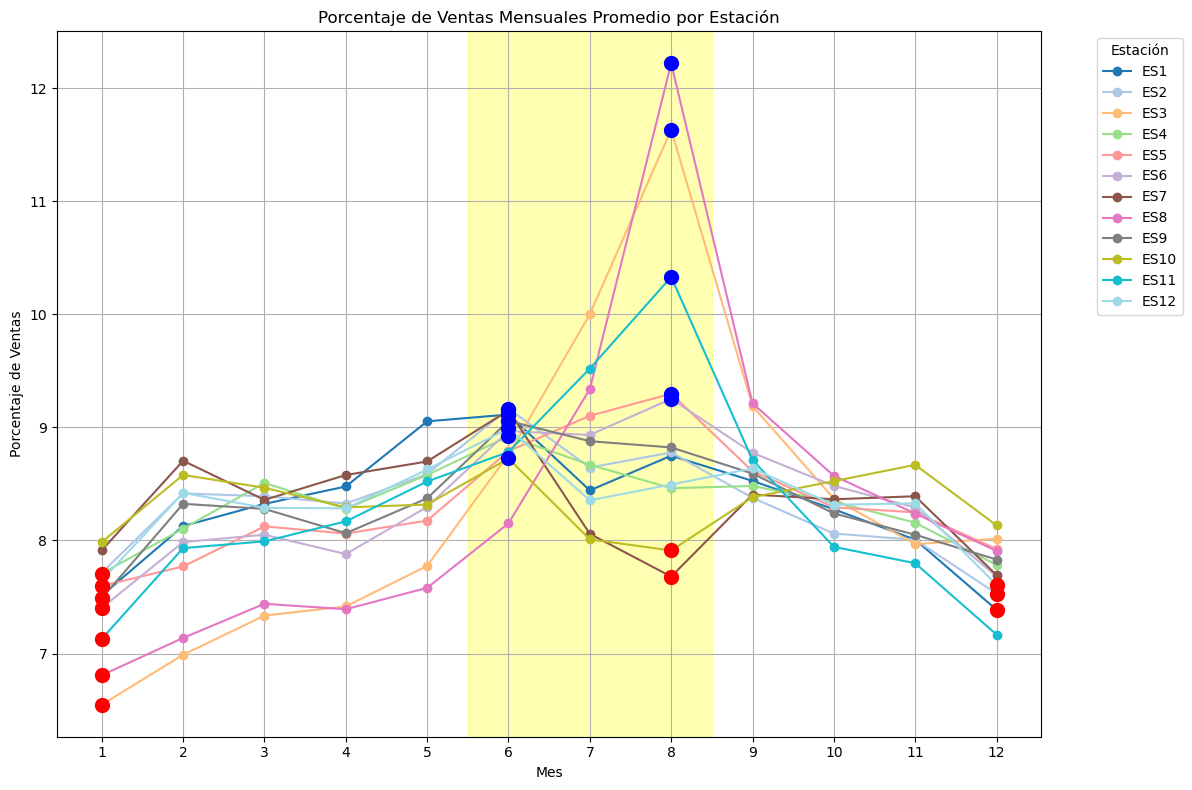

In [28]:
# Lista completa de estaciones
estaciones = ['ES1', 'ES2', 'ES3', 'ES4', 'ES5', 'ES6', 'ES7', 'ES8', 'ES9', 'ES10', 'ES11', 'ES12']

# Asegurar que todos los meses están presentes para cada estación
lista_completa = []
for estacion in estaciones:
    temp_df = meses.copy()
    temp_df['Nombre'] = estacion
    lista_completa.append(temp_df)

todos_meses = pd.concat(lista_completa)
promedio_mensual_completo = todos_meses.merge(promedio_mensual, on=['Nombre', 'Mes'], how='left').fillna(0)

# Pivoteo del DataFrame para facilitar el gráfico
porcentaje_mensual_pivot = promedio_mensual_completo.pivot(index='Mes', columns='Nombre', values='Porcentaje')

# Graficar los datos en un gráfico de líneas
plt.figure(figsize=(12, 8))

# Generar una lista de colores
colors = plt.cm.get_cmap('tab20', len(porcentaje_mensual_pivot.columns))

# Ordenar las columnas de acuerdo a la lista especificada
porcentaje_mensual_pivot = porcentaje_mensual_pivot[estaciones]

for i, column in enumerate(porcentaje_mensual_pivot.columns):
    plt.plot(porcentaje_mensual_pivot.index, porcentaje_mensual_pivot[column], marker='o', label=column, color=colors(i))

    # Señalamos el punto más alto y más bajo
    max_value = porcentaje_mensual_pivot[column].max()
    max_month = porcentaje_mensual_pivot[column].idxmax()
    min_value = porcentaje_mensual_pivot[column].min()
    min_month = porcentaje_mensual_pivot[column].idxmin()

    # Marcadores discretos para los puntos máximo y mínimo
    plt.scatter(max_month, max_value, color='blue', s=100, zorder=5)  # Marcador azul para el punto más alto
    plt.scatter(min_month, min_value, color='red', s=100, zorder=5)  # Marcador rojo para el punto más bajo

# Meses de verano (junio, julio y agosto) en amarillo claro
plt.axvspan(6 - 0.5, 8 + 0.5, color='yellow', alpha=0.3)

plt.title('Porcentaje de Ventas Mensuales Promedio por Estación')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de Ventas')
plt.xticks(range(1, 13))  # Asegurar que todos los meses están en el eje X
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Se observa en los meses de agosto y junio se encuentran los picos más altos de porcentaje de ventas. Esto está indicado con puntos azules más grandes en la gráfica, señalando los puntos máximos. Contrariamente, enero y diciembre son los meses con el menor porcentaje de ventas para varias estaciones, lo cual se indica con puntos rojos más grandes, señalando los puntos mínimos.

Los meses de verano (junio, julio y agosto) están resaltados con una franja amarilla. Durante estos meses, es notable que muchas estaciones experimentan un incremento significativo en el porcentaje de ventas, alcanzando sus máximos anuales en junio o agosto.

La siguiente gráfica que se presenta muestra una serie temporal de los precios (agrupados gasolina y diesel) de las doce estaciones de servicio agrupadas por mes durante los años 2016, 2017 y 2018.

In [33]:
# Creamos columna Año-Mes
df_ventas['Año-Mes'] = df_ventas['Dia'].dt.to_period('M')

# Agrupamos por estación y mes, luego calcular el precio promedio
df_grouped = df_ventas.groupby(['Nombre', 'Año-Mes'])['PVP'].mean().reset_index()

# Period a Timestamp para facilitar la gráfica
df_grouped['Año-Mes'] = df_grouped['Año-Mes'].dt.to_timestamp()

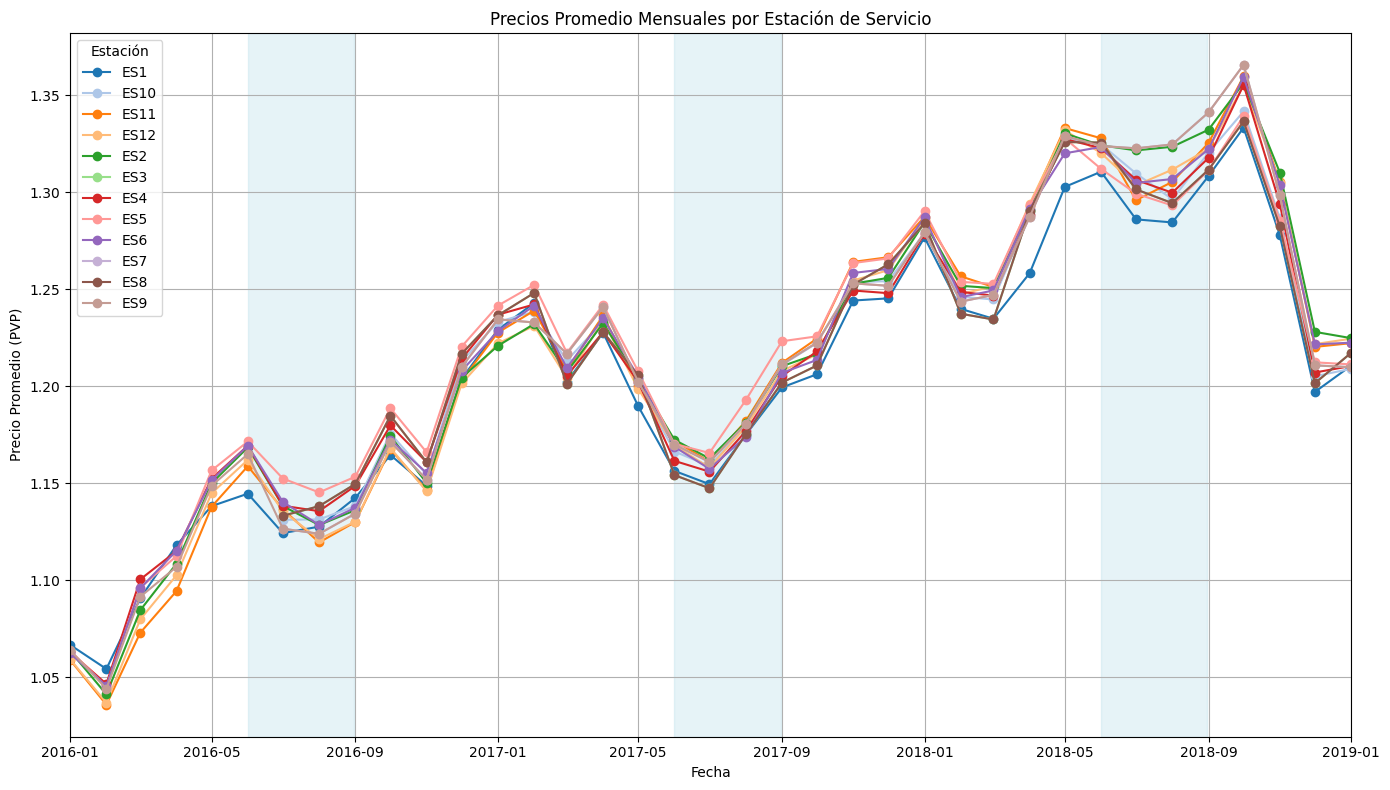

In [34]:
# Filtramos los primeros meses de ES3, ES8, ES7 y ES10 (son precios constantes, se nos paso de esta manera debido a que no se tenian precios)
df_grouped = df_grouped[~((df_grouped['Nombre'] == 'ES3') & (df_grouped['Año-Mes'] < pd.Timestamp('2016-07-01')))]
df_grouped = df_grouped[~((df_grouped['Nombre'] == 'ES8') & (df_grouped['Año-Mes'] < pd.Timestamp('2016-07-01')))]
df_grouped = df_grouped[~((df_grouped['Nombre'] == 'ES7') & (df_grouped['Año-Mes'] < pd.Timestamp('2016-07-01')))]
df_grouped = df_grouped[~((df_grouped['Nombre'] == 'ES10') & (df_grouped['Año-Mes'] < pd.Timestamp('2016-07-01')))]

# Graficar
plt.figure(figsize=(14, 8))

# Usar una paleta de colores para las diferentes estaciones
colors = plt.cm.tab20.colors

# Iteramos sobre cada estación y graficar
for i, estacion in enumerate(df_grouped['Nombre'].unique()):
    estacion_data = df_grouped[df_grouped['Nombre'] == estacion]
    plt.plot(estacion_data['Año-Mes'], estacion_data['PVP'], marker='o', label=estacion, color=colors[i % len(colors)])

for year in df_grouped['Año-Mes'].dt.year.unique():
    plt.axvspan(pd.Timestamp(f'{year}-06-01'), pd.Timestamp(f'{year}-08-31'), color='lightblue', alpha=0.3) # Resaltar los meses de verano (junio, julio y agosto)

plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2019-01-01'))

plt.title('Precios Promedio Mensuales por Estación de Servicio')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio (PVP)')
plt.legend(title='Estación')
plt.grid(True)
plt.tight_layout()
plt.show()


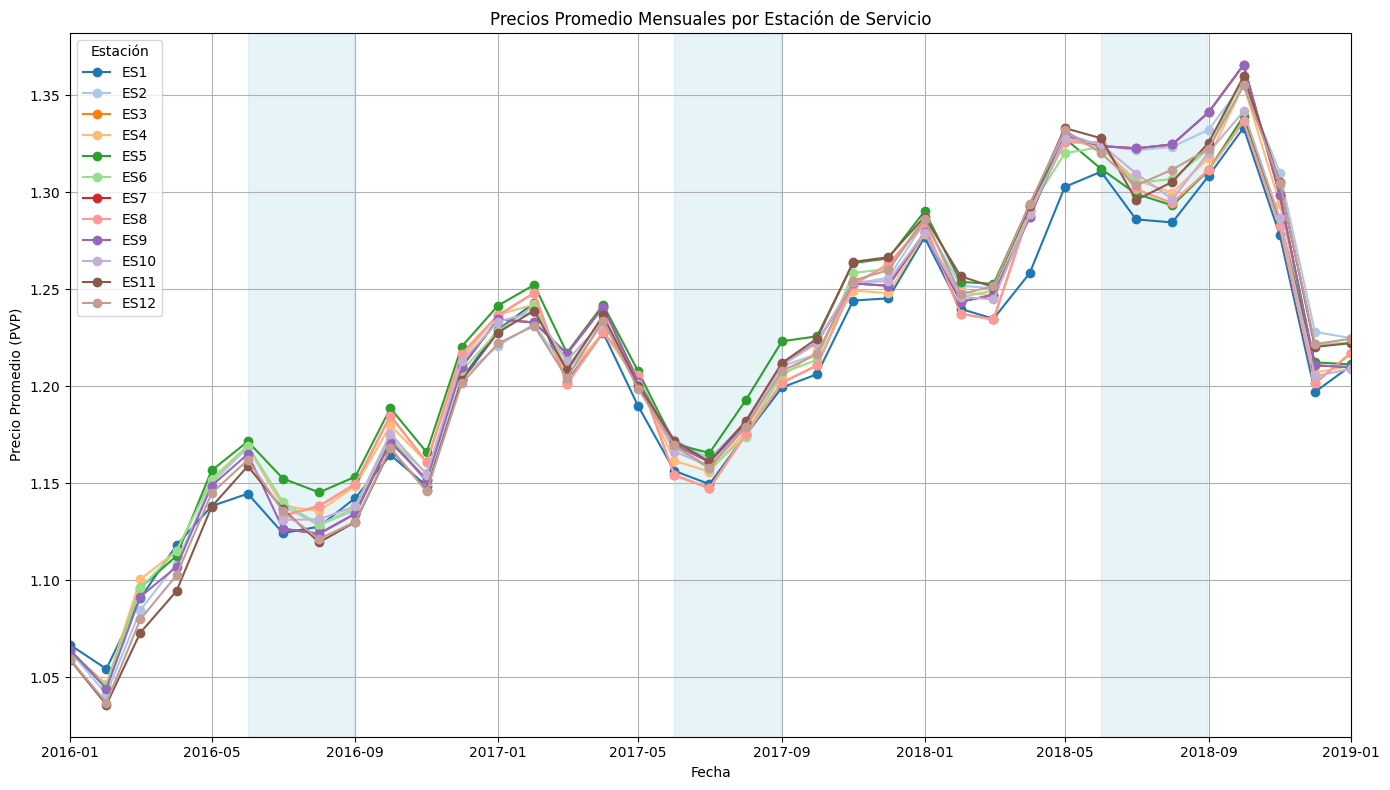

In [36]:
# Creamos columna Año-Mes
df_ventas['Año-Mes'] = df_ventas['Dia'].dt.to_period('M')

# Agrupamos por estación y mes, luego calcular el precio promedio
df_grouped = df_ventas.groupby(['Nombre', 'Año-Mes'])['PVP'].mean().reset_index()

# Period a Timestamp para facilitar la gráfica
df_grouped['Año-Mes'] = df_grouped['Año-Mes'].dt.to_timestamp()

# Filtramos los primeros meses de ES3, ES8, ES7 y ES10 (son precios constantes, se nos paso de esta manera debido a que no se tenian precios)
df_grouped = df_grouped[~((df_grouped['Nombre'] == 'ES3') & (df_grouped['Año-Mes'] < pd.Timestamp('2016-07-01')))]
df_grouped = df_grouped[~((df_grouped['Nombre'] == 'ES8') & (df_grouped['Año-Mes'] < pd.Timestamp('2016-07-01')))]
df_grouped = df_grouped[~((df_grouped['Nombre'] == 'ES7') & (df_grouped['Año-Mes'] < pd.Timestamp('2016-07-01')))]
df_grouped = df_grouped[~((df_grouped['Nombre'] == 'ES10') & (df_grouped['Año-Mes'] < pd.Timestamp('2016-07-01')))]

# Graficar
plt.figure(figsize=(14, 8))

# Usar una paleta de colores para las diferentes estaciones
colors = plt.cm.tab20.colors

# Orden específico para las estaciones
orden_estaciones = ['ES1', 'ES2', 'ES3', 'ES4', 'ES5', 'ES6', 'ES7', 'ES8', 'ES9', 'ES10', 'ES11', 'ES12']

# Iteramos sobre cada estación y graficar en el orden específico
for i, estacion in enumerate(orden_estaciones):
    if estacion in df_grouped['Nombre'].unique():
        estacion_data = df_grouped[df_grouped['Nombre'] == estacion]
        plt.plot(estacion_data['Año-Mes'], estacion_data['PVP'], marker='o', label=estacion, color=colors[i % len(colors)])

for year in df_grouped['Año-Mes'].dt.year.unique():
    plt.axvspan(pd.Timestamp(f'{year}-06-01'), pd.Timestamp(f'{year}-08-31'), color='lightblue', alpha=0.3) # Resaltar los meses de verano (junio, julio y agosto)

plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2019-01-01'))

plt.title('Precios Promedio Mensuales por Estación de Servicio')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio (PVP)')
plt.legend(title='Estación')
plt.grid(True)
plt.tight_layout()
plt.show()


Se observa en la gráfica que la variable Precio Venta al Público (PVP) no se comporta  igual que la variable de Ventas. Se muestra una tendencia general al alza en los precios promedio mensuales.
Asimismo, se observa cierta estacionalidad en los meses de verano en los años analizados, disminuyendo en el mes de junio, alcanzando el punto más bajo en julio y creciendo en agosto.

# **Analisis de Metereología**

In [29]:
df_met = pd.read_csv("data/processed_meteo.csv")

In [30]:
df_met.head()

,Dia,dir,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia
0,2016-01-01,18,7.0,1012.5,998.3,19.4,1.8,15.3,12.4,9.4,5.8
1,2016-01-02,22,2.2,1014.3,1006.2,13.6,5.7,14.0,11.2,8.4,4.2
2,2016-01-03,25,12.0,1006.2,996.9,19.2,0.0,15.6,14.0,12.3,5.8
3,2016-01-04,29,11.2,999.9,994.5,17.8,0.0,13.0,11.0,9.1,6.7
4,2016-01-05,99,7.6,1006.2,998.6,21.4,1.9,11.2,9.5,7.8,10.8


In [31]:
for i in df_met.columns:
  print(i, len(df_met[i].unique()))

Dia 1127
dir 35
prec 122
presMax 302
presMin 349
racha 76
sol 148
tmax 188
tmed 166
tmin 162
velmedia 34


In [32]:
#missing data
total = df_met.isnull().sum().sort_values(ascending=False)
percent = (df_met.isnull().sum()/df_met.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Dia,0,0.0
dir,0,0.0
prec,0,0.0
presMax,0,0.0
presMin,0,0.0
racha,0,0.0
sol,0,0.0
tmax,0,0.0
tmed,0,0.0
tmin,0,0.0


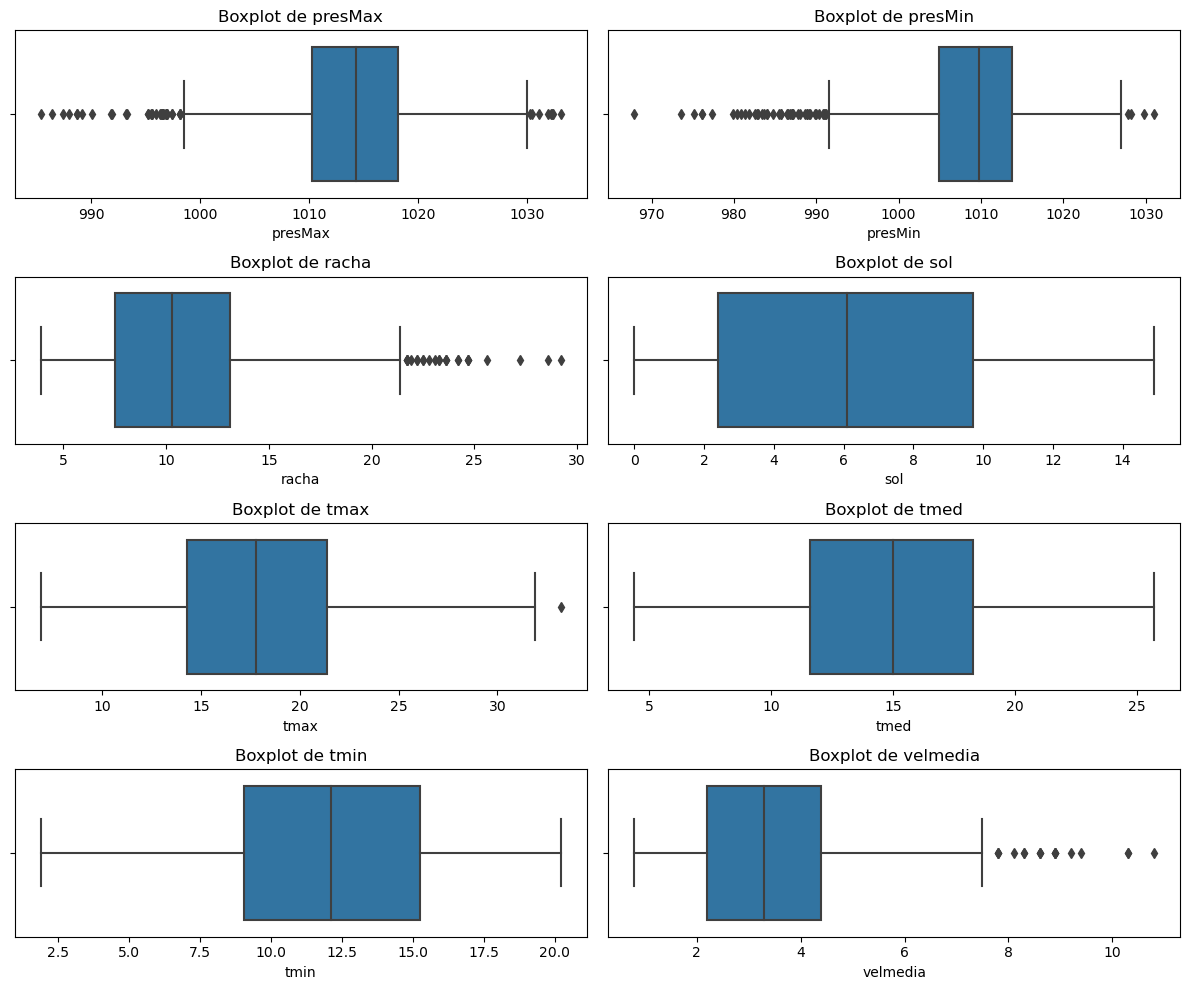

In [33]:
# Variables numéricas para los boxplots
numeric_vars = ['presMax', 'presMin', 'racha', 'sol', 'tmax', 'tmed', 'tmin', 'velmedia']

# Configuración del tamaño de la figura
plt.figure(figsize=(12, 10))

for i, var in enumerate(numeric_vars, 1):
    plt.subplot(4, 2, i)  # Crear subgráfico en la posición i
    sns.boxplot(x=df_met[var])  # Crear boxplot para la variable 'var'
    plt.title(f'Boxplot de {var}')  # Título del boxplot
    plt.xlabel(var)  # Etiqueta del eje x

plt.tight_layout()  # Ajustar automáticamente la disposición de los subgráficos
plt.show()

Al observar los boxplots de estas variables, se pueden extraer varias conclusiones sobre su distribución y posibles impactos en el modelo de predicción:



*   La variable de temperatura máxima (tmax) muestra una distribución entre 10 y 25 grados Celsius, con algunos valores atípicos por encima de 30 grados.
*   Las horas de sol (sol), que varían de 0 a 14 horas, también son una variable interesante.
*   La temperatura media (tmed) y la mínima (tmin) ofrecen un panorama más estable sobre las condiciones climáticas diarias.
*   La velocidad media del viento (velmedia), aunque presenta menor variabilidad en comparación con la racha, sigue siendo una variable relevante.
*  En cuanto a las presiones máxima (presMax) y mínima (presMin), aunque su impacto directo en el consumo de combustible puede parecer menos evidente, estas variables pueden estar correlacionadas con otros fenómenos meteorológicos significativos.







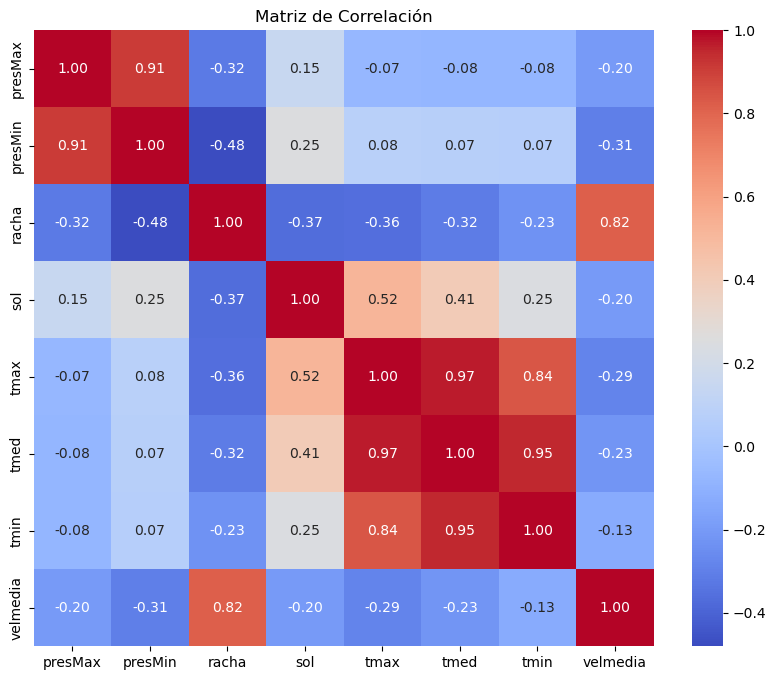

Las 3 correlaciones más altas son:
tmax y tmed: 0.97
tmed y tmin: 0.95
presMax y presMin: 0.91


In [34]:
# Obtenemos la matriz de correlación
correlation_matrix = df_met[numeric_vars].corr()

# Visualizar
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Encontrar las variables con las mayores correlaciones (positivas o negativas)
correlation_pairs = []

for i in range(len(numeric_vars)):
    for j in range(i + 1, len(numeric_vars)):
        var1 = numeric_vars[i]
        var2 = numeric_vars[j]
        corr_value = correlation_matrix.loc[var1, var2]
        correlation_pairs.append((var1, var2, corr_value))

# Ordenar la lista de tuplas por valor absoluto de correlación (de mayor a menor)
correlation_pairs_sorted = sorted(correlation_pairs, key=lambda x: abs(x[2]), reverse=True)

# Imprimir las primeras N (por ejemplo, las 3 más altas) correlaciones
num_top_correlations = 3
print(f"Las {num_top_correlations} correlaciones más altas son:")

for pair in correlation_pairs_sorted[:num_top_correlations]:
    var1, var2, corr_value = pair
    print(f"{var1} y {var2}: {corr_value:.2f}")

La matriz de correlación proporciona una visión de cómo las variables meteorológicas están correlacionadas mutuamente, reflejando posibles redundancias y complementariedades en el modelo de predicción:


*   Las variables de temperatura máxima (tmax), media (tmed) y mínima (tmin), están altamente correlacionadas, con coeficientes superiores a 0.95.
*   Las horas de sol, muestran una correlación moderada con las temperaturas.


# **Análisis de Tráfico**

In [43]:
traffic = pd.read_csv("data/processed_traffic.csv")
traffic = traffic[traffic["year"] > 2011].copy()
ventas = pd.read_csv("data/combined_data.csv")
ventas["Dia"] = pd.to_datetime(ventas["Dia"])

In [37]:
traffic.head()

,id,point,fes_imd,p_pes,mean_m_0,mean_m_1,mean_m_2,mean_m_3,mean_m_4,mean_m_5,...,mean_w_0,mean_w_1,mean_w_2,mean_w_3,mean_w_4,mean_w_5,mean_w_6,year,lat,lon
399,AC-101(4),POINT (-7.8438878153653935 43.48419873017167),1.387,8.508333,1262.0,1290.0,1310.0,1421.0,1361.0,1490.0,...,1417.0,1405.0,1427.0,1527.0,1607.0,1337.0,1394.0,2012,43.484199,-7.843888
400,AC-102(4),POINT (-8.00163770861231 43.62158423284121),971.000,7.916667,997.0,1031.0,1036.0,1108.0,1081.0,1182.0,...,1115.0,1096.0,1133.0,1167.0,1246.0,1049.0,943.0,2012,43.621584,-8.001638
401,AC-115(2),POINT (-8.157306981380483 43.49650807462777),7.240,4.483333,8683.0,9100.0,9232.0,9169.0,9309.0,9481.0,...,9498.0,9504.0,9586.0,9772.0,10346.0,8363.0,6792.0,2012,43.496508,-8.157307
402,AC-133(1),POINT (-8.179427765772212 43.470641842565186),6.869,2.791667,8691.0,9087.0,9262.0,9281.0,9587.0,9864.0,...,10052.0,9872.0,10129.0,10209.0,10762.0,8741.0,6215.0,2012,43.470642,-8.179428
403,AC-133(6),POINT (-8.210148718168293 43.44353007137544),2.835,4.175000,3301.0,3308.0,3439.0,3555.0,3607.0,3826.0,...,3796.0,3758.0,3771.0,3838.0,4066.0,3464.0,2683.0,2012,43.443530,-8.210149


In [38]:
def scaling(series):
    return series / series.sum()

In [39]:
year_agg_m = traffic.groupby("year")[[col for col in traffic.columns if "mean_m" in col]].mean().mean()
year_agg_m.index = range(1, 12 + 1)
week_agg_m = traffic.groupby("year")[[col for col in traffic.columns if "mean_w" in col]].mean().mean()
week_agg_m.index = range(1, 7 + 1)

Las siguientes gráficas muestran el porcentaje mensual y semanal de tráfico, indicando que un poco más del 10% del tráfico se concentra en agosto en promedio entre los sensores. Las gráficas también presentan los porcentajes de volumen de ventas sobre el percentil 25%, percentil 75% y la mediana de las estaciones de servicio.



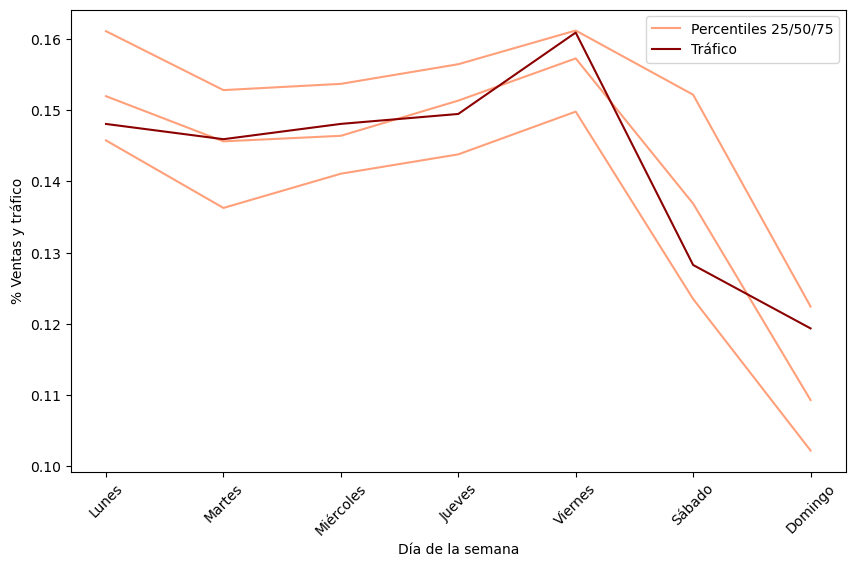

In [45]:
# Sales and traffic weekly mean
ventas_traffic_plot = ventas.copy()
ventas_traffic_plot["Week"] = ventas_traffic_plot["Dia"].dt.weekday + 1
ventas_traffic_plot = ventas_traffic_plot.groupby(["Nombre", "Producto", "Week"], as_index=False)["VentasN"].mean()
ventas_traffic_plot["VentasN"] = ventas_traffic_plot.groupby(["Nombre", "Producto"], group_keys=False)["VentasN"].apply(scaling)
ventas_traffic_plot = ventas_traffic_plot.groupby("Week")["VentasN"].quantile([0.25, 0.5, 0.75]).reset_index()

fig = plt.figure(figsize=(10, 6))

soft_orange = '#FFA07A'

for perc in ventas_traffic_plot["level_1"].unique():
    ventas_perc = ventas_traffic_plot[ventas_traffic_plot["level_1"]==perc].set_index("Week")["VentasN"].copy()
    plt.plot(ventas_perc, color=soft_orange)
plt.plot([], [], color=soft_orange, label="Percentiles 25/50/75")

plt.plot(scaling(week_agg_m), color="darkred", label="Tráfico")
plt.xlabel("Día de la semana")
plt.ylabel("% Ventas y tráfico")
plt.xticks([1, 2, 3, 4, 5, 6, 7], ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"], rotation=45)
plt.legend()
plt.show()

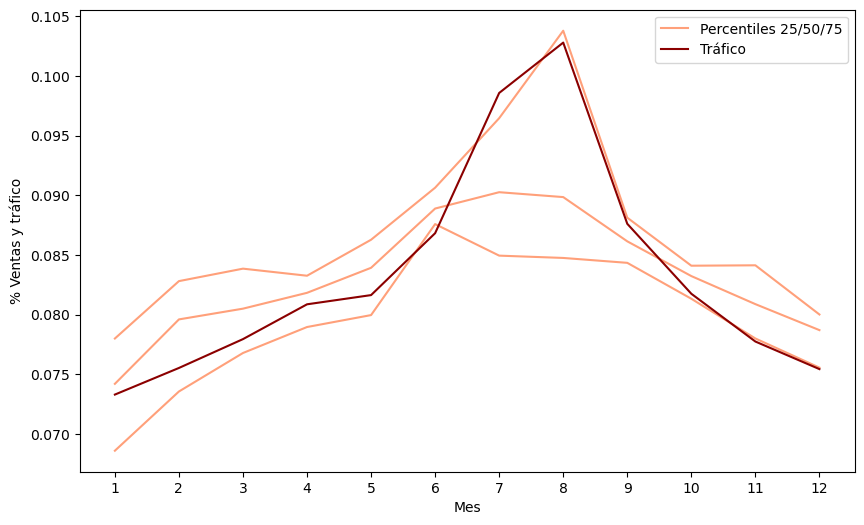

In [47]:
# Sales and traffic monthly mean
ventas_traffic_plot = ventas.copy()
ventas_traffic_plot["Month"] = ventas_traffic_plot["Dia"].dt.month
ventas_traffic_plot = ventas_traffic_plot.groupby(["Nombre", "Producto", "Month"], as_index=False)["VentasN"].mean()
ventas_traffic_plot["VentasN"] = ventas_traffic_plot.groupby(["Nombre", "Producto"], group_keys=False)["VentasN"].apply(scaling)
ventas_traffic_plot = ventas_traffic_plot.groupby("Month")["VentasN"].quantile([0.25, 0.5, 0.75]).reset_index()

fig = plt.figure(figsize=(10, 6))

soft_orange = '#FFA07A'

for perc in ventas_traffic_plot["level_1"].unique():
    ventas_perc = ventas_traffic_plot[ventas_traffic_plot["level_1"]==perc].set_index("Month")["VentasN"].copy()
    plt.plot(ventas_perc, color=soft_orange)
plt.plot([], [], color=soft_orange, label="Percentiles 25/50/75")

plt.plot(scaling(year_agg_m), color="darkred", label="Tráfico")
plt.xlabel("Mes")
plt.ylabel("% Ventas y tráfico")
plt.xticks(range(1, 12 + 1))
plt.legend()
plt.show()

Se observa que la estacionalidad del tráfico y las ventas es similar

In [55]:
repsol_eess = ventas.dropna().groupby("Nombre", as_index=False).agg({"Latitud": "first", "Longitud": "first"})
map = folium.Map(location=[repsol_eess["Latitud"].mean(), repsol_eess["Longitud"].mean()], zoom_start=4)

for _, row in traffic.drop_duplicates(subset=["id"]).dropna().iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=row["id"]
    ).add_to(map)

for _, row in repsol_eess.iterrows():

    folium.Circle(
        location=[row["Latitud"], row["Longitud"]],
        radius=5000,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.2
    ).add_to(map)

for _, row in repsol_eess.iterrows():

    folium.CircleMarker(
        location=[row["Latitud"], row["Longitud"]],
        radius=7,
        color='lightgreen',
        fill=True,
        fill_color='green',
        fill_opacity=0.9,
        popup=row["Nombre"]
    ).add_to(map)

In [56]:
map

# **Análisis de ventas**

In [57]:
price_df = pd.read_csv("data/processed_prices.csv")
price_df["Dia"] = pd.to_datetime(price_df["Dia"])

In [58]:
repsol_eess = ventas.dropna().groupby("Nombre", as_index=False).agg({"Latitud": "first", "Longitud": "first"})
other_eess = price_df.groupby(["IDEESS"], as_index=False)[["Latitud", "Longitud"]].agg("first")

eess_map = {
    'ES1': 524, # Petronor
    'ES2': 481, # Repsol
    'ES3': 450,
    'ES4': 604,
    'ES5': 559,
    'ES6': 505,
    'ES7': 626, # TO CHECK
    'ES8': 641,
    'ES9': 549,
    'ES10': 646,
    'ES11': 634,
    'ES12': 596,
}

In [59]:
def haversine(lat1, lon1, lat2, lon2):
    # Earth radius in meters
    R = 6371000
    d_lat = np.radians(lat2 - lat1)
    d_lon = np.radians(lon2 - lon1)
    a = np.sin(d_lat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(d_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

distances = pd.DataFrame(index=repsol_eess['Nombre'], columns=other_eess['IDEESS']).copy()
for idx1, row1 in repsol_eess.iterrows():
    for idx2, row2 in other_eess.iterrows():
        distances.loc[row1["Nombre"], row2["IDEESS"]] = haversine(row1['Latitud'], row1['Longitud'], row2['Latitud'], row2['Longitud'])

close_eess_map = {}
for idx1, row in distances.copy().iterrows():
    close_eess_map[idx1] = [i for i in row[row < 5000].index.tolist() if i != eess_map[idx1]]

Tomamos la estación ES10 como ejemplo y observando el máximo y mínimo del precio del diésel en su zona de influencia

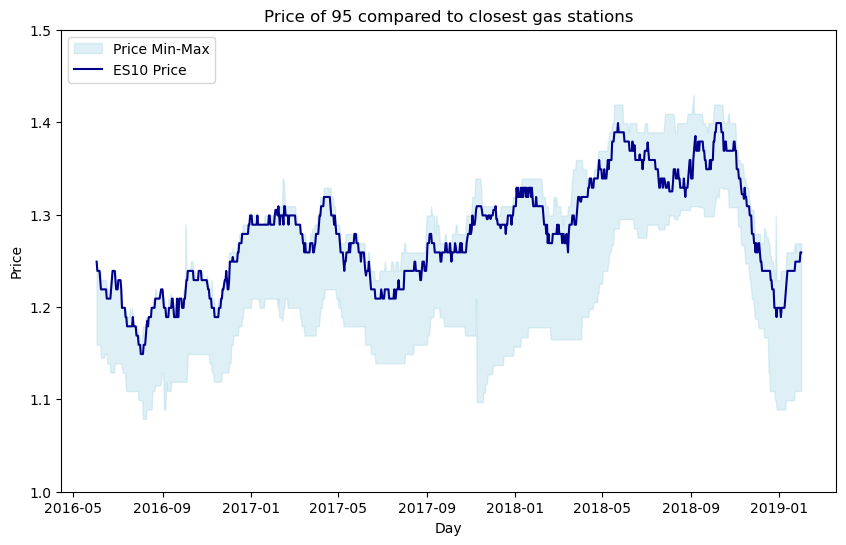

In [62]:
selected_eess = "ES10"
selected_product = "95"

test_price_eess = price_df[(price_df["IDEESS"].isin(close_eess_map[selected_eess])) & (price_df["Producto"] == selected_product)].copy()
test_price_eess = test_price_eess.groupby(["Dia"])["PrecioProducto"].agg([("count_comp", "count"), ("mean_comp", "mean"), ("min_comp", "min"), ("max_comp", "max")]).reset_index()
test_ventas_eess = ventas[(ventas["Nombre"] == selected_eess) & (ventas["Producto"] == selected_product)][["Dia", "PVP"]].copy()

price_plot = test_price_eess.merge(test_ventas_eess, on="Dia", how="inner").dropna()

plt.figure(figsize=(10, 6))
plt.fill_between(price_plot['Dia'], price_plot['min_comp'], price_plot['max_comp'], color='lightblue', alpha=0.4, label='Price Min-Max')
plt.plot(price_plot['Dia'], price_plot['PVP'], color='darkblue', label=f'{selected_eess} Price')

plt.xlabel('Day')
plt.ylim(1, 1.5)
plt.ylabel('Price')
plt.title(f'Price of {selected_product} compared to closest gas stations')
plt.legend(loc="upper left")

plt.show()

 El precio en ES10 se mantiene cercano al máximo de su área de influencia. Sin embargo, alrededor de septiembre de 2018, el precio en ES10 se aleja del máximo durante varios meses.

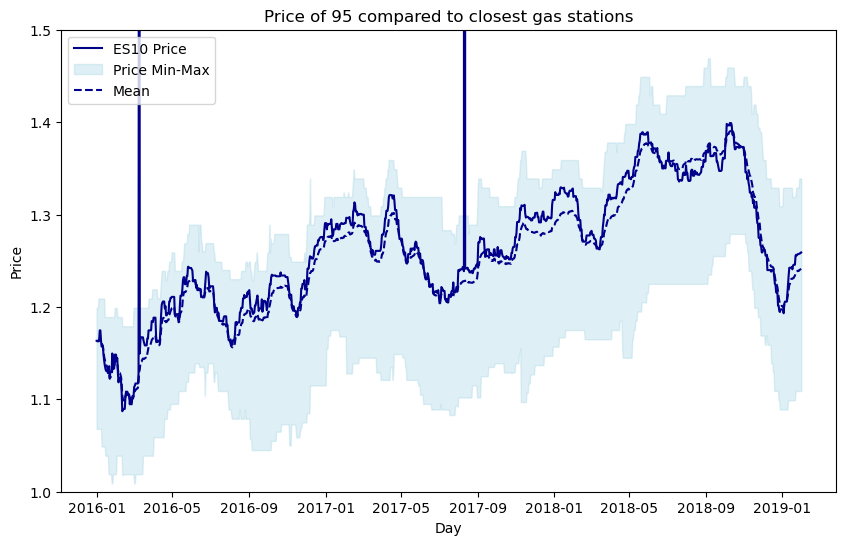

In [63]:
selected_product = "95"

test_price_eess = price_df[(price_df["Producto"] == selected_product)].copy()
test_price_eess = test_price_eess.groupby(["Dia"])["PrecioProducto"].agg([
    ("mean_comp", "mean"),
    ("min_comp", "min"),
    ("max_comp", "max"),
    ("percentile_25", lambda x: x.quantile(0.25)),
    ("percentile_75", lambda x: x.quantile(0.75))
]).reset_index()

test_ventas_eess = ventas[(ventas["Producto"] == selected_product)].groupby("Dia", as_index=False)["PVP"].mean().copy()

price_plot = test_price_eess.merge(test_ventas_eess, on="Dia", how="inner").dropna()

plt.figure(figsize=(10, 6))
plt.plot(price_plot['Dia'], price_plot['PVP'], color='darkblue', label=f'{selected_eess} Price')
plt.fill_between(price_plot['Dia'], price_plot['min_comp'], price_plot['max_comp'], color='lightblue', alpha=0.4, label='Price Min-Max')
plt.plot(price_plot['Dia'], price_plot['mean_comp'], color='darkblue', linestyle='--', label='Mean')

plt.xlabel('Day')
plt.ylim(1, 1.5)
plt.ylabel('Price')
plt.title(f'Price of {selected_product} compared to closest gas stations')
plt.legend(loc="upper left")

plt.show()

La gráfica siguiente describe el comportamiento del precio del diésel en las estaciones de servicio estudiadas comparadas con el resto de la provincia de A Coruña. Muestra el precio medio de las estaciones de estudio, la media de todas las estaciones de la provincia, y el rango que abarca desde el mínimo y máximo y el rango de los cuartiles 1 y 3

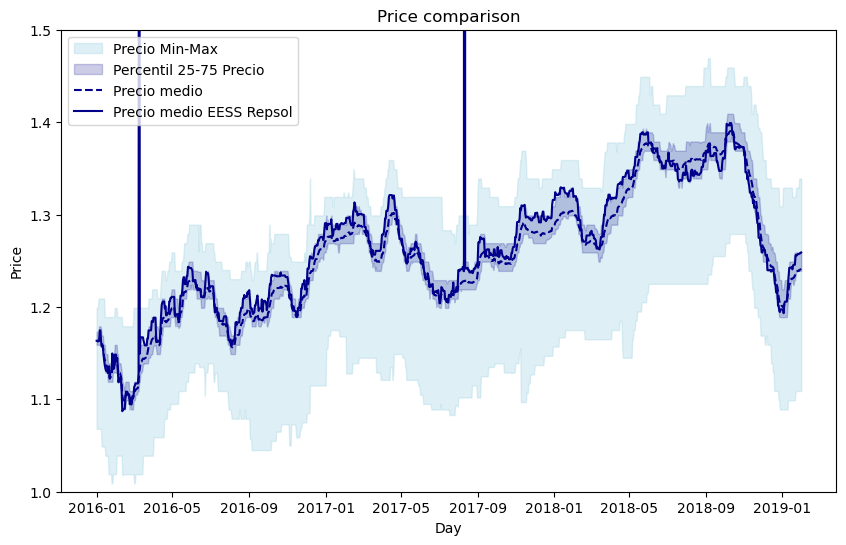

In [64]:
plt.figure(figsize=(10, 6))

plt.fill_between(price_plot['Dia'], price_plot['min_comp'], price_plot['max_comp'], color='lightblue', alpha=0.4, label='Precio Min-Max')
plt.fill_between(price_plot['Dia'], price_plot['percentile_25'], price_plot['percentile_75'], color='darkblue', alpha=0.2, label='Percentil 25-75 Precio')
plt.plot(price_plot['Dia'], price_plot['mean_comp'], color='darkblue', linestyle='--', label='Precio medio')
plt.plot(price_plot['Dia'], price_plot['PVP'], color='darkblue', label='Precio medio EESS Repsol')

plt.xlabel('Day')
plt.ylim(1, 1.5)
plt.ylabel('Price')
plt.title('Price comparison')
plt.legend(loc="upper left")

# Mostrar el gráfico
plt.show()

Se observa que, en promedio, los precios en las estaciones estudiadas tienden a estar más cerca del máximo que del mínimo

El siguiente mapa muestra los sensores (puntos azules), las estaciones de servicio (puntos verdes) y la zona de influencia de cada estación (circunferencia azul).

In [67]:
map = folium.Map(location=[repsol_eess["Latitud"].mean(), repsol_eess["Longitud"].mean()], zoom_start=4)

for _, row in price_df.drop_duplicates(subset=["IDEESS"]).iterrows():
    folium.CircleMarker(
        location=[row["Latitud"], row["Longitud"]],
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=row["IDEESS"]
    ).add_to(map)

for _, row in repsol_eess.iterrows():

    folium.Circle(
        location=[row["Latitud"], row["Longitud"]],
        radius=5000,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.2
    ).add_to(map)

for _, row in repsol_eess.iterrows():
    folium.CircleMarker(
        location=[row["Latitud"], row["Longitud"]],
        radius=10,
        color='lightgreen',
        fill=True,
        fill_color='green',
        fill_opacity=0.95,
        popup=row["Nombre"]
    ).add_to(map)


In [68]:
map